In [97]:
import pandas as pd
import numpy as np
data=pd.read_csv("new_data.csv")

In [98]:
data

,Unnamed: 0,date,chat,time,messager
0,1,25/10/23,Hi,07:31,NIVEDITTA
1,2,25/10/23,Anerkennungsberatung des TBB,07:31,NIVEDITTA
2,5,29/10/23,https://www.google.com/search?q=free+museum+o...,09:17,NIVEDITTA
3,6,29/10/23,Jewish Museum Berlin,09:29,NIVEDITTA
4,9,29/10/23,Asian Art Museum,09:40,NIVEDITTA
...,...,...,...,...,...
133,361,27/02/25,4165983442925293,21:48,Niveditta German No
134,362,01/04/25,<Media omitted>,21:17,Niveditta German No
135,363,02/04/25,<Media omitted>,19:41,Niveditta German No
136,364,03/04/25,<Media omitted>,05:13,Niveditta German No


# 1 applying flirt detection model on the watsapp chat

In [66]:
import pickle
tf=pickle.load(open("tfvectorizer.sav","rb"))

In [4]:
chat_matrix=tf.transform(data["chat"])

In [5]:
model=pickle.load(open("model_dt.sav","rb"))

In [6]:
model.predict(chat_matrix)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

# 2 finding who is more talkative and less talkative

In [7]:
msg_count=data["messager"].value_counts()

In [8]:
msg_count.index

Index([' NIVEDITTA', ' Niveditta German No'], dtype='object')

In [9]:
msg_count.values

array([124,  14], dtype=int64)

In [38]:
msg_lt=data["chat"].apply(len)
msg_lt.max()

46

In [40]:
msg_lt_max=data.groupby("messager")["chat"].apply(len)
msg_lt_max

messager
 NIVEDITTA              124
 Niveditta German No     14
Name: chat, dtype: int64

# so from above we can see niveditta has sent max no of messages and the max lent of message sent by niveditta is higher
# so she is more talkative

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'measure of talkativeness')

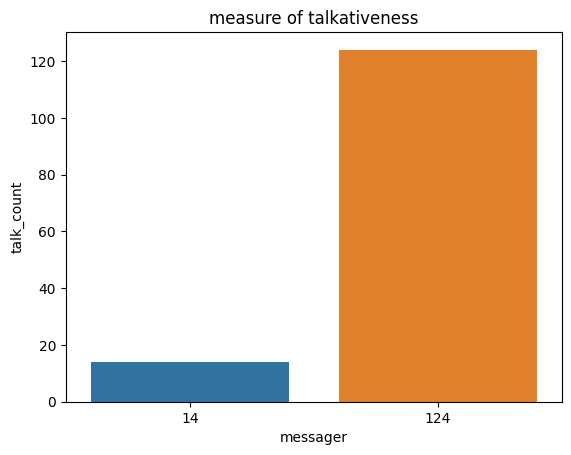

In [36]:
sns.barplot(msg_count,x=msg_count.index,y=msg_count.values)
plt.ylabel("talk_count")
plt.title("measure of talkativeness")

# 3.Most Active Day, Most Active Time


In [43]:
max_msg=data["date"].value_counts().max()

In [44]:
max_msg

7

In [46]:
active_date=data["date"].value_counts()[data["date"].value_counts()==max_msg]
active_date.index

Index(['04/11/23', '08/02/24', '25/01/24'], dtype='object')

([<matplotlib.patches.Wedge at 0x241263a7048>,
 [Text(0.5499999702695115, 0.9526279613277875, '04/11/23'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '08/02/24'),
  Text(0.5500001486524352, -0.9526278583383436, '25/01/24')])

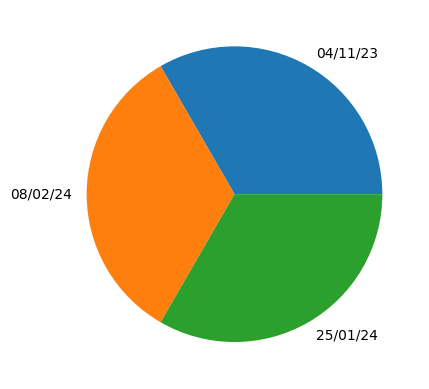

In [47]:
plt.pie(active_date,labels=active_date.index)

# now the most active time

In [67]:
data["time"].value_counts().max()

7

In [70]:
most_active_time_counts=data.groupby("time")["chat"].count()
most_active_time

time
 00:17     1
 00:46     1
 03:05     1
 05:13     1
 06:53     1
          ..
 23:21     1
 23:26     1
 23:27     1
 23:30     1
 23:50     1
Name: chat, Length: 120, dtype: int64

In [75]:
max_msgs_atthe_time=most_active_time.max()
max_msgs_atthe_time

7

In [74]:
mst_activ_tim=most_active_time.idxmax()
mst_activ_tim

' 15:07 '

#  Media count sent by each person


In [99]:
data["chat"]=data["chat"].str.strip()

In [104]:
media=data[data["chat"] == "<Media omitted>"]["messager"].value_counts()

Text(0.5, 1.0, 'Media count sent by each person')

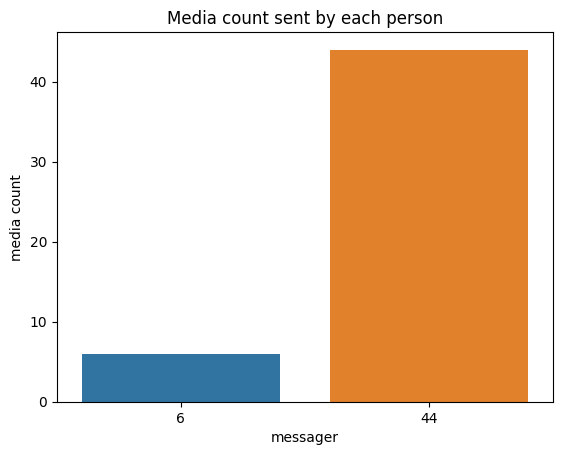

In [107]:
sns.barplot(media,x=media.index,y=media.values)
plt.ylabel("media count")
plt.title("Media count sent by each person")